# Menggunakan Library Tensorflow

In [1]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import logging
logging.getLogger('matplotlib.font_manager').disabled = True
import random

seed_value = 75
tf.random.set_seed(seed_value)
np.random.seed(seed_value)
random.seed(seed_value)

AttributeError: module 'tensorflow.core.framework.types_pb2' has no attribute 'SerializedDType'

In [10]:
fashion_mnist = tf.keras.datasets.fashion_mnist

(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

29515/29515 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
26421880/26421880 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
5148/5148 ━━━━━━━━━━━━━━━━━━━━ 0s 1us/step
4422102/4422102 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [11]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

In [12]:
train_images.shape

(60000, 28, 28)

In [13]:
train_labels

array([9, 0, 0, ..., 3, 0, 5], dtype=uint8)

In [14]:
test_images.shape

(10000, 28, 28)

In [15]:
len(test_labels)

10000

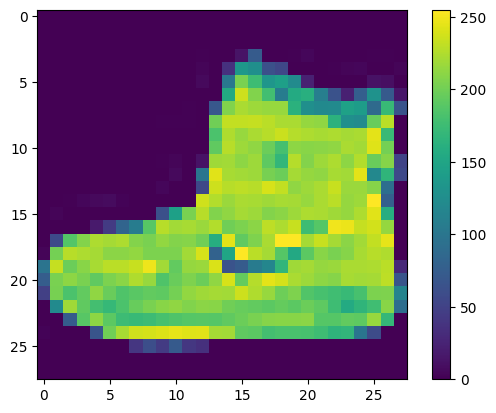

In [16]:
plt.figure()
plt.imshow(train_images[0])
plt.colorbar()
plt.grid(False)
plt.show()

In [17]:
train_images = train_images.reshape(-1, 28, 28, 1).astype('float32') / 255
test_images = test_images.reshape(-1, 28, 28, 1).astype('float32') / 255

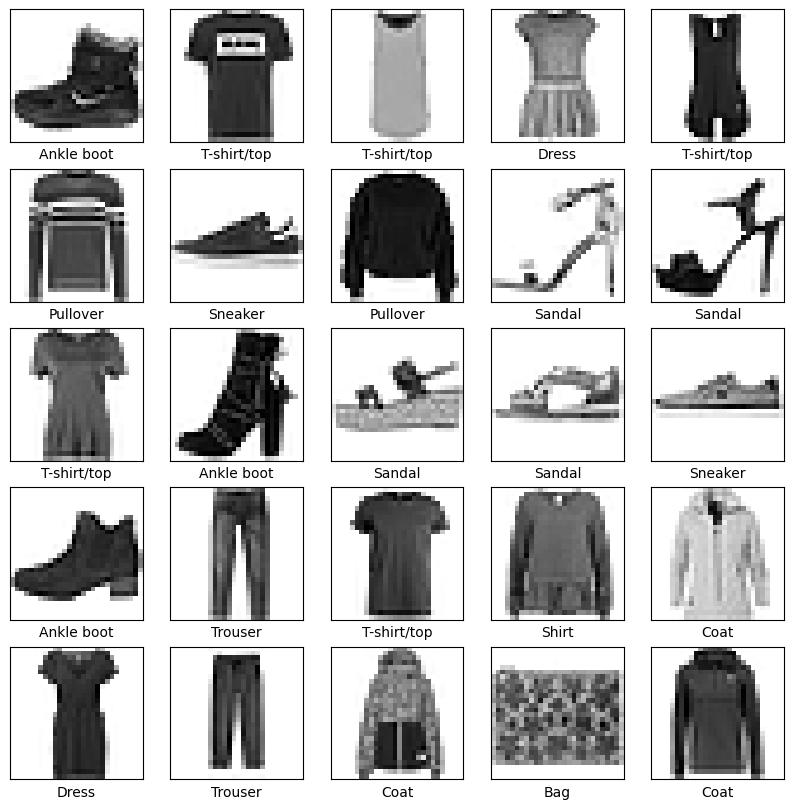

In [18]:
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i], cmap=plt.cm.binary)
    plt.xlabel(class_names[train_labels[i]])
plt.show()

In [19]:
model_tf = tf.keras.Sequential([
    tf.keras.layers.Input(shape=(28, 28)),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dropout(0.3),
    tf.keras.layers.Dense(300, activation='relu'),
    tf.keras.layers.Dropout(0.3),
    tf.keras.layers.Dense(10),
])


In [20]:
model_tf.compile(optimizer='adam',
                 loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
                 metrics=['accuracy'])


In [21]:
from keras.callbacks import EarlyStopping

early_stopping = EarlyStopping(
    monitor='val_accuracy',
    patience=5,
    min_delta=0.0001,
    restore_best_weights=True
)

history = model_tf.fit(
    train_images, train_labels,
    epochs=40,
    validation_data=(test_images, test_labels),
    callbacks=[early_stopping]
)


Epoch 1/40
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 12s 5ms/step - accuracy: 0.7241 - loss: 0.7511 - val_accuracy: 0.8392 - val_loss: 0.4346
Epoch 2/40
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 20s 5ms/step - accuracy: 0.8343 - loss: 0.4514 - val_accuracy: 0.8521 - val_loss: 0.3975
Epoch 3/40
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 9s 5ms/step - accuracy: 0.8492 - loss: 0.4132 - val_accuracy: 0.8559 - val_loss: 0.3843
Epoch 4/40
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 5ms/step - accuracy: 0.8578 - loss: 0.3924 - val_accuracy: 0.8608 - val_loss: 0.3835
Epoch 5/40
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 5ms/step - accuracy: 0.8633 - loss: 0.3723 - val_accuracy: 0.8690 - val_loss: 0.3581
Epoch 6/40
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - accuracy: 0.8675 - loss: 0.3618 - val_accuracy: 0.8700 - val_loss: 0.3591
Epoch 7/40
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 5ms/step - accuracy: 0.8699 - loss: 0.3534 - val_accuracy: 0.8692 - val_loss: 0.3556
Epoch 8/40
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 5ms/step - accuracy: 0.8724 - loss: 0.3

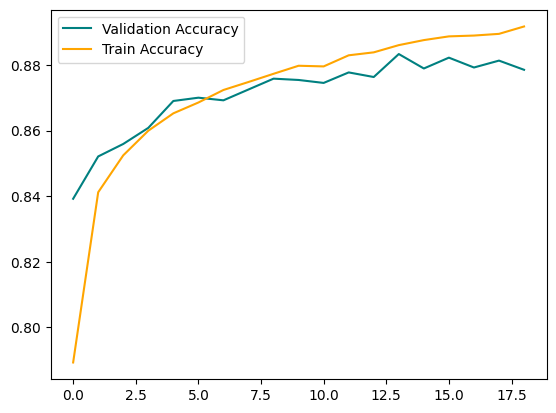

In [22]:
fig = plt.figure()
plt.plot(history.history['val_accuracy'], color='teal', label='Validation Accuracy')
plt.plot(history.history['accuracy'], color='orange', label='Train Accuracy')
plt.legend(loc="upper left")
plt.show()


In [23]:
test_loss, test_acc_tf = model_tf.evaluate(test_images, test_labels, verbose=2)

print('\nTest accuracy:', test_acc_tf)


313/313 - 0s - 2ms/step - accuracy: 0.8833 - loss: 0.3281

Test accuracy: 0.8833000063896179


In [24]:
probability_model = tf.keras.Sequential([
    model_tf,
    tf.keras.layers.Softmax()
])

In [25]:
predictions_tf = probability_model.predict(test_images)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


In [26]:
predictions_tf[0]

array([3.0551868e-07, 1.2068348e-07, 2.8262985e-08, 7.5731350e-09,
       9.2331533e-07, 7.2170701e-04, 6.0732822e-07, 1.6925246e-02,
       1.2525380e-06, 9.8234975e-01], dtype=float32)

In [27]:
np.argmax(predictions_tf[0])


9

In [28]:
test_labels[0]

9

In [29]:
def plot_image(i, predictions_array, true_label, img):
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])

  plt.imshow(img, cmap=plt.cm.binary)

  predicted_label = np.argmax(predictions_array)
  if predicted_label == true_label:
      color = 'blue'
  else:
      color = 'red'

  plt.xlabel("{} {:2.0f}% ({})".format(class_names[predicted_label],
                                       100 * np.max(predictions_array),
                                       class_names[true_label]),
                                       color=color)


def plot_value_array(i, predictions_array, true_label):
  true_label = true_label[i]
  plt.grid(False)
  plt.xticks(range(10))
  plt.yticks([])
  thisplot = plt.bar(range(10), predictions_array, color="#777777")
  plt.ylim([0, 1])

  predicted_label = np.argmax(predictions_array)
  thisplot[predicted_label].set_color('red')
  thisplot[true_label].set_color('blue')

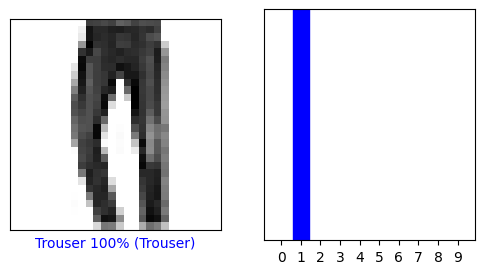

In [30]:
i = 5
plt.figure(figsize=(6, 3))
plt.subplot(1, 2, 1)
plot_image(i, predictions_tf[i], test_labels[i], test_images[i])
plt.subplot(1, 2, 2)
plot_value_array(i, predictions_tf[i], test_labels)
plt.show()


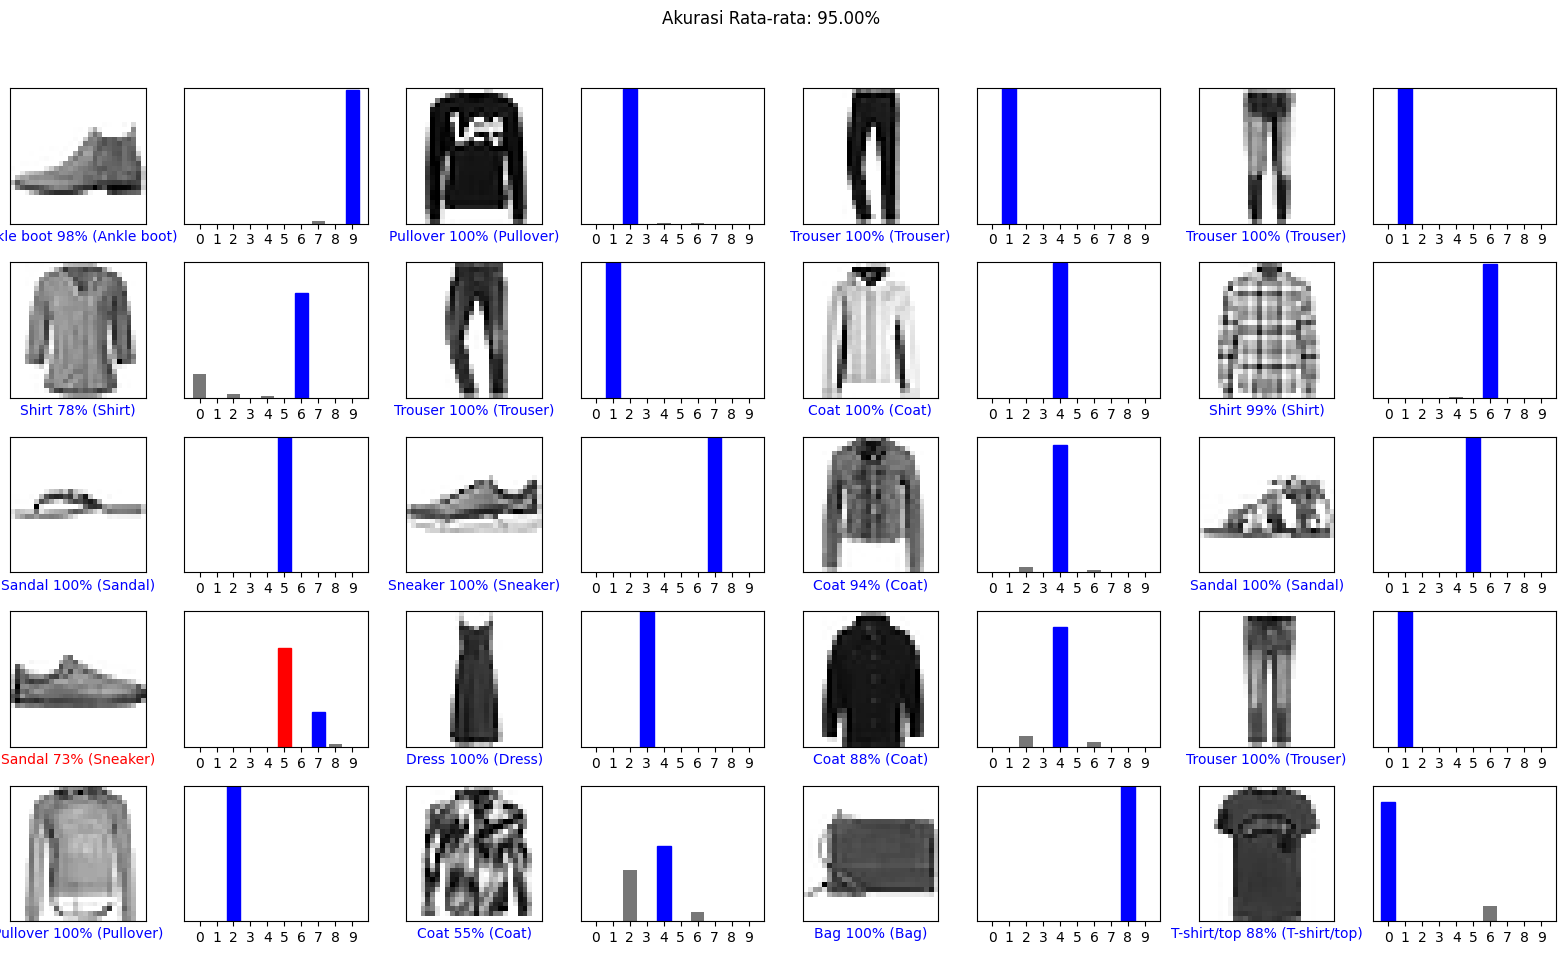

In [31]:
import numpy as np
import matplotlib.pyplot as plt

num_rows = 5
num_cols = 4
num_images = num_rows * num_cols

correct_predictions = [np.argmax(predictions_tf[i]) == test_labels[i] for i in range(num_images)]
average_accuracy = np.mean(correct_predictions) * 100

plt.figure(figsize=(2 * 2 * num_cols, 2 * num_rows))
for i in range(num_images):
    plt.subplot(num_rows, 2 * num_cols, 2 * i + 1)
    plot_image(i, predictions_tf[i], test_labels[i], test_images[i])

    plt.subplot(num_rows, 2 * num_cols, 2 * i + 2)
    plot_value_array(i, predictions_tf[i], test_labels)

plt.suptitle(f'Akurasi Rata-rata: {average_accuracy:.2f}%')
plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()


In [32]:
img = test_images[1]

print(img.shape)

(28, 28, 1)


In [33]:
img = (np.expand_dims(img,0))

print(img.shape)

(1, 28, 28, 1)


In [34]:
predictions_single = probability_model.predict(img)

print(predictions_single)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
[[5.0505064e-06 4.5014812e-12 9.9538815e-01 9.5594602e-11 2.7173287e-03
  1.1744280e-18 1.8893732e-03 9.6923485e-22 3.8977552e-10 8.7646707e-20]]


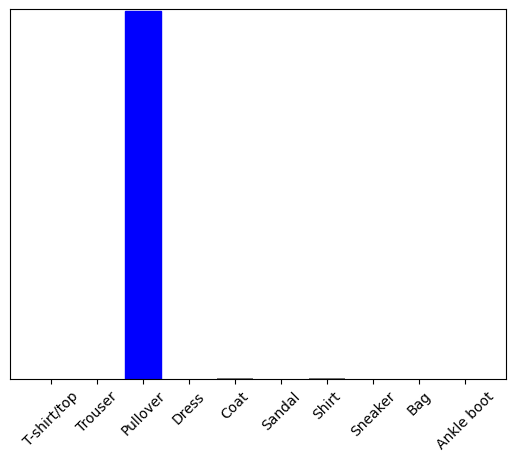

In [35]:
plot_value_array(1, predictions_single[0], test_labels)
_ = plt.xticks(range(10), class_names, rotation=45)
plt.show()

In [36]:
np.argmax(predictions_single[0])

2

In [37]:
df_test = pd.DataFrame({
    'Target': test_labels,
    'Predicted': np.argmax(predictions_tf, axis=1),
    'Proba_0': predictions_tf[:, 0],
    'Proba_1': predictions_tf[:, 1]
})

pixels = test_images.reshape(len(test_images), -1)

df_pixels = pd.DataFrame(pixels, columns=[f'pixel{i+1}' for i in range(28*28)])

df_test = pd.concat([df_test, df_pixels], axis=1)


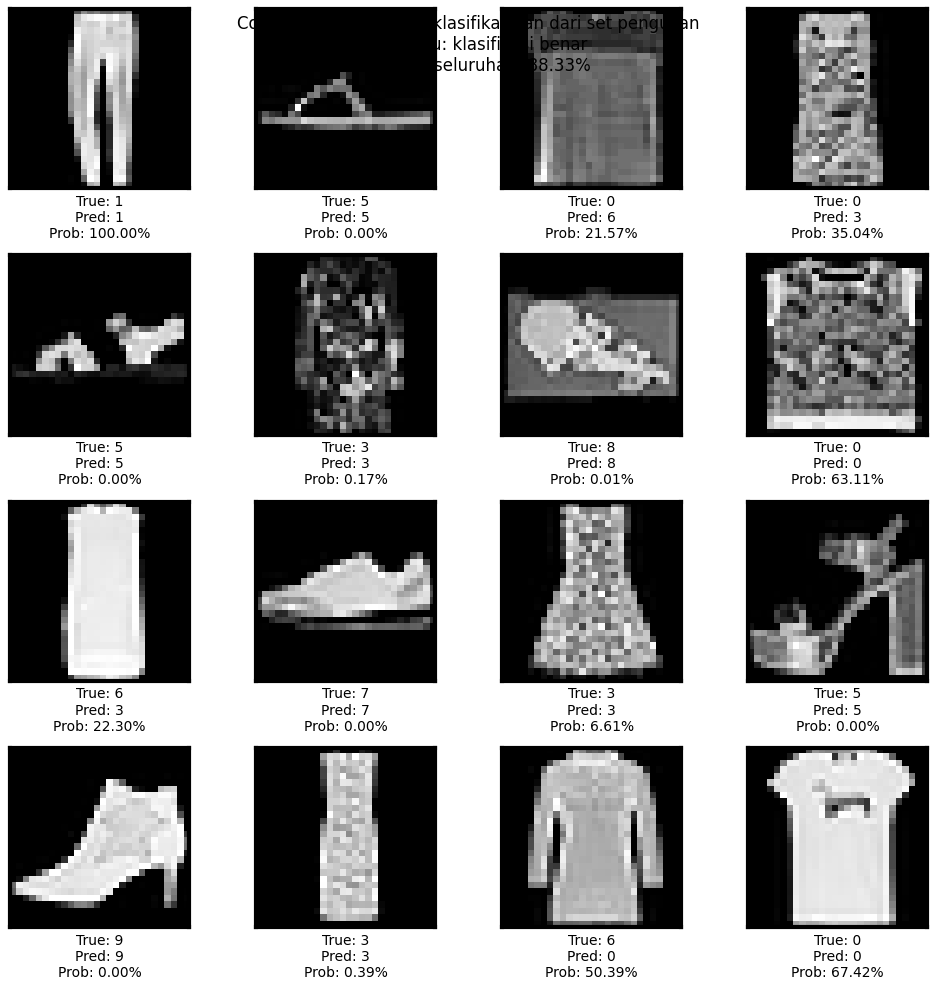

In [38]:
df_plot = df_test.sample(16, random_state=75).copy()
fig, ax = plt.subplots(4, 4, figsize=(10, 10))

rata1_accuracy = (df_test['Target'] == df_test['Predicted']).mean() * 100

for i, axi in enumerate(ax.flat):

    predicted_class = df_plot['Predicted'].values[i]
    prediction_probability = max(df_plot['Proba_0'].values[i], df_plot['Proba_1'].values[i]) * 100

    true_class = df_plot['Target'].values[i]

    pixels = df_plot[[f'pixel{j+1}' for j in range(28*28)]].values[i].reshape(28, 28)

    axi.imshow(pixels, cmap='gray')
    axi.set(xticks=[], yticks=[],
            xlabel=f"True: {true_class}\nPred: {predicted_class}\nProb: {prediction_probability:.2f}%")

    edge_color = 'green' if predicted_class == true_class else 'pink'
    axi.spines['top'].set_linewidth(3)
    axi.spines['right'].set_linewidth(3)
    axi.spines['left'].set_linewidth(3)
    axi.spines['bottom'].set_linewidth(3)

fig.tight_layout()
fig.suptitle(f'Contoh gambar yang diklasifikasikan dari set pengujian\n'
             f'Batas hijau: klasifikasi benar\nAkurasi Keseluruhan: {rata1_accuracy:.2f}%')
plt.show()


# Menggunakan Library Scikit-Learn

In [39]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import tensorflow as tf

In [40]:
import warnings
warnings.filterwarnings("ignore")
warnings.simplefilter("ignore")


In [41]:
from sklearn.datasets import fetch_openml

fashion_mnist = fetch_openml('Fashion-MNIST', version=1)

train_images = fashion_mnist.data[:60000]  # Data pelatihan
train_labels = fashion_mnist.target[:60000].astype(int)  # Label pelatihan
test_images = fashion_mnist.data[60000:]  # Data pengujian
test_labels = fashion_mnist.target[60000:].astype(int)  # Label pengujian


In [42]:
train_images = train_images / 255.0
test_images = test_images / 255.0

In [43]:
from sklearn.model_selection import cross_val_score, train_test_split
from sklearn.metrics import make_scorer, log_loss
from sklearn.neural_network import MLPClassifier
import numpy as np

train_images_split, test_images_split, train_labels_split, test_labels_split = train_test_split(
    train_images, train_labels, test_size=0.2, random_state=75
)

model_sklearn = MLPClassifier(hidden_layer_sizes=(128, 300),
                              activation='relu',
                              early_stopping=True,
                              validation_fraction=0.2,
                              max_iter=10,
                              verbose=True)

model_sklearn.fit(train_images_split, train_labels_split)

training_loss = model_sklearn.loss_curve_

print(f"Training loss curve: {training_loss}")


Iteration 1, loss = 0.63435453
Validation score: 0.830729
Iteration 2, loss = 0.41376975
Validation score: 0.857917
Iteration 3, loss = 0.36625866
Validation score: 0.845208
Iteration 4, loss = 0.33747474
Validation score: 0.868958
Iteration 5, loss = 0.31719076
Validation score: 0.875208
Iteration 6, loss = 0.29824644
Validation score: 0.876146
Iteration 7, loss = 0.28250896
Validation score: 0.876667
Iteration 8, loss = 0.26838658
Validation score: 0.880208
Iteration 9, loss = 0.25845233
Validation score: 0.878646
Iteration 10, loss = 0.24703613
Validation score: 0.873958
Training loss curve: [0.6343545288870013, 0.4137697470051438, 0.3662586626222523, 0.33747474168860975, 0.3171907550134408, 0.29824643822334557, 0.2825089606458701, 0.26838657803211735, 0.258452331943699, 0.24703613367733374]


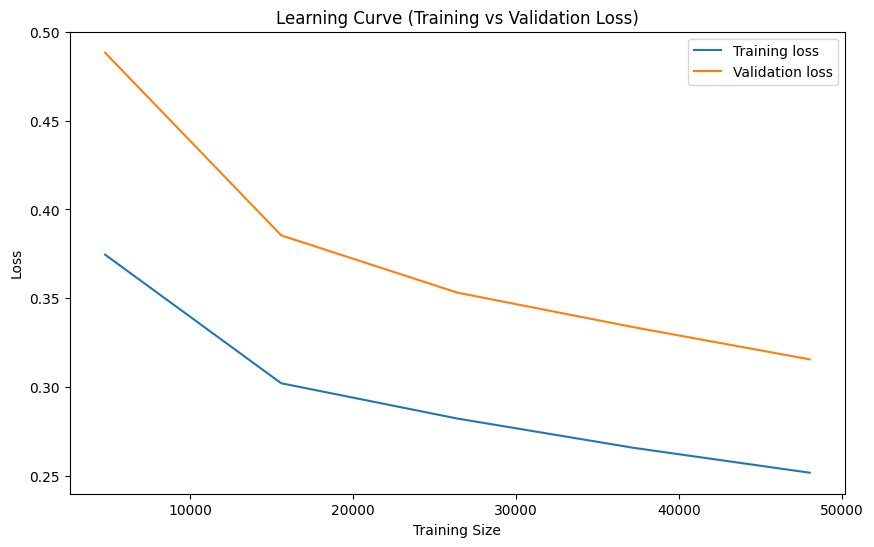

In [44]:
from sklearn.model_selection import learning_curve

train_sizes = np.linspace(0.1, 1.0, 5)

train_sizes, train_scores, val_scores = learning_curve(
    model_sklearn, train_images, train_labels, train_sizes=train_sizes,
    cv=5, scoring='neg_log_loss', random_state=75, n_jobs=-1
)

train_loss_mean = -train_scores.mean(axis=1)
val_loss_mean = -val_scores.mean(axis=1)

plt.figure(figsize=(10, 6))
plt.plot(train_sizes, train_loss_mean, label='Training loss')
plt.plot(train_sizes, val_loss_mean, label='Validation loss')
plt.xlabel('Training Size')
plt.ylabel('Loss')
plt.title('Learning Curve (Training vs Validation Loss)')
plt.legend()
plt.show()

In [45]:
test_predictions = model_sklearn.predict(test_images)
test_acc_sklearn = accuracy_score(test_labels, test_predictions)

print(f'Test accuracy: {test_acc_sklearn}')


Test accuracy: 0.8736


In [46]:
print("\nClassification Report:\n", classification_report(test_labels, test_predictions))

predictions_proba = model_sklearn.predict_proba(test_images)


Classification Report:
               precision    recall  f1-score   support

           0       0.84      0.82      0.83      1000
           1       1.00      0.96      0.98      1000
           2       0.80      0.78      0.79      1000
           3       0.83      0.93      0.87      1000
           4       0.79      0.80      0.79      1000
           5       0.98      0.95      0.96      1000
           6       0.69      0.66      0.67      1000
           7       0.95      0.91      0.93      1000
           8       0.98      0.96      0.97      1000
           9       0.90      0.98      0.94      1000

    accuracy                           0.87     10000
   macro avg       0.87      0.87      0.87     10000
weighted avg       0.87      0.87      0.87     10000



In [47]:
predictions_sklearn = model_sklearn.predict_proba(test_images)
print(predictions_sklearn[0])
print("Predicted label for first image", np.argmax(predictions_sklearn[0]))
print("Actual label for first image:", test_labels.iloc[0])

[5.41330077e-07 1.97756215e-07 1.01957926e-06 3.28493881e-07
 4.57876960e-07 2.14245978e-03 1.41741127e-06 3.03116223e-03
 1.70572860e-06 9.94820710e-01]
Predicted label for first image 9
Actual label for first image: 9


In [48]:
def plot_image(i, predictions_array, true_label, img):
    true_label, img = true_label.iloc[i], img.iloc[i].values.reshape(28, 28)
    plt.grid(False)
    plt.xticks([])
    plt.yticks([])

    plt.imshow(img, cmap=plt.cm.binary)

    predicted_label = np.argmax(predictions_array)
    color = 'blue' if predicted_label == true_label else 'red'

    plt.xlabel(f"{class_names[predicted_label]} {100*np.max(predictions_array):.2f}% ({class_names[true_label]})", color=color)

def plot_value_array(i, predictions_array, true_label):
    true_label = true_label.iloc[i]
    plt.xticks(range(10))
    thisplot = plt.bar(range(10), predictions_array, color="#7777")
    plt.ylim([0, 1])
    predicted_label = np.argmax(predictions_array)

    thisplot[predicted_label].set_color('red')
    thisplot[true_label].set_color('blue')


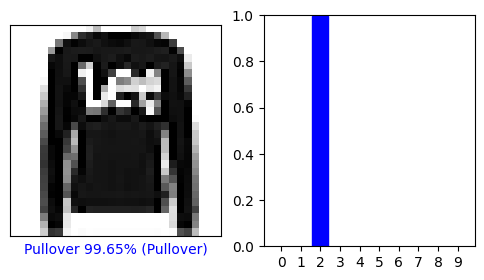

In [49]:
i=1
plt.figure(figsize=(6, 3))
plt.subplot(1, 2, 1)
plot_image(i, predictions_sklearn[i], test_labels, test_images)
plt.subplot(1, 2, 2)
plot_value_array(i, predictions_sklearn[i], test_labels)
plt.show()

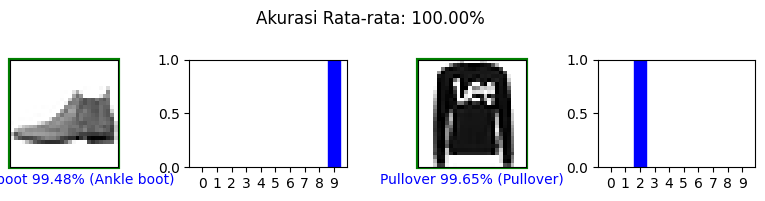

In [50]:
import numpy as np
import matplotlib.pyplot as plt

num_rows = 1
num_cols = 2
num_images = num_rows * num_cols

correct_predictions = [np.argmax(predictions_sklearn[i]) == test_labels.iloc[i] for i in range(num_images)]
average_accuracy = np.mean(correct_predictions) * 100

plt.figure(figsize=(2 * 2 * num_cols, 2 * num_rows))
for i in range(num_images):
    plt.subplot(num_rows, 2 * num_cols, 2 * i + 1)
    plot_image(i, predictions_sklearn[i], test_labels, test_images)
    border_color = 'green' if correct_predictions[i] else 'red'
    plt.gca().patch.set_edgecolor(border_color)
    plt.gca().patch.set_linewidth(3)

    plt.subplot(num_rows, 2 * num_cols, 2 * i + 2)
    plot_value_array(i, predictions_sklearn[i], test_labels)

plt.suptitle(f'Akurasi Rata-rata: {average_accuracy:.2f}%')
plt.tight_layout()
plt.show()

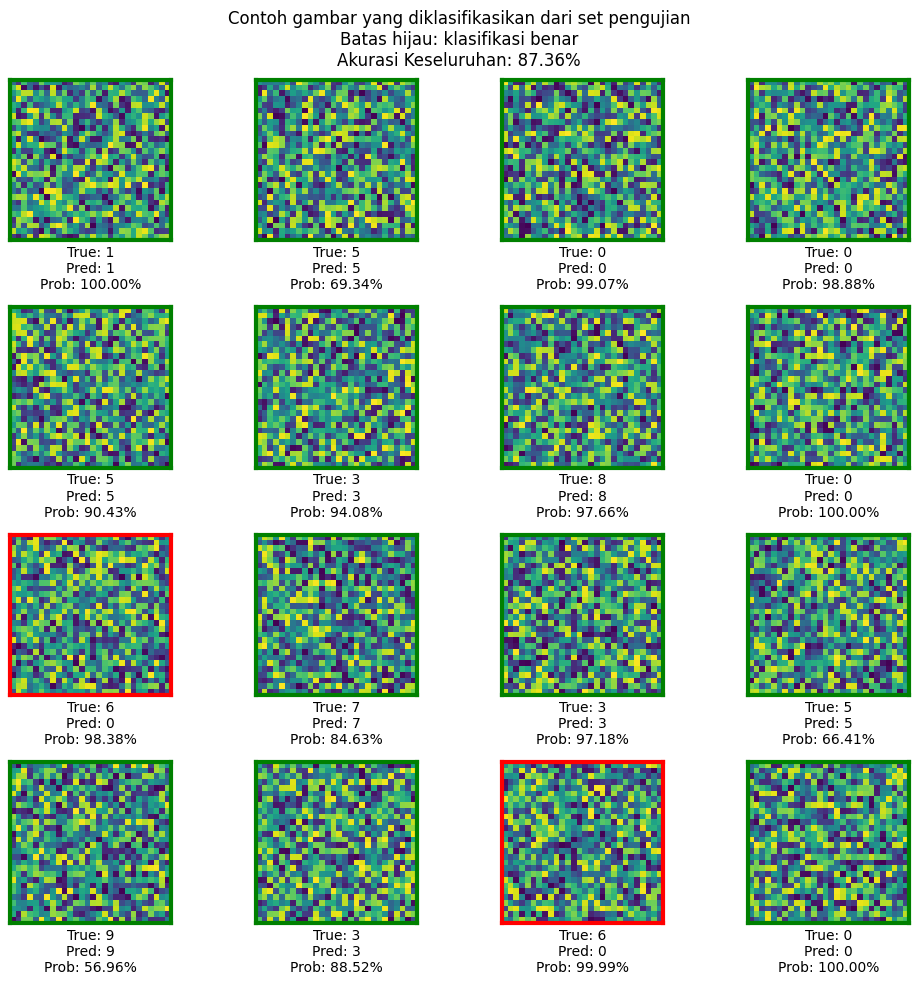

In [51]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

n_samples = 10000

df_test = pd.DataFrame({
    'Target': test_labels,
    'Predicted': np.argmax(predictions_sklearn, axis=1),
    'Proba_0': predictions_sklearn[:, 0],
    'Proba_1': predictions_sklearn[:, 1]
})

df_test['Proba_0'] = df_test['Proba_0'] / (df_test['Proba_0'] + df_test['Proba_1'])
df_test['Proba_1'] = 1 -df_test['Proba_0']

for i in range(1, 28*28 + 1):
    df_test[f'pixel{i}'] = np.random.randint(0, 256, n_samples)

df_plot = df_test.sample(16, random_state=75).copy()

fig, ax = plt.subplots(4, 4, figsize=(10, 10))
rata2_accuracy = (df_test['Target'] == df_test['Predicted']).mean() * 100

for i, axi in enumerate(ax.flat):
    p0 = df_plot['Proba_0'].values[i]
    p1 = df_plot['Proba_1'].values[i]
    predicted_class = df_plot['Predicted'].values[i]
    prediction_probability = max(p0, p1) * 100
    true_class = df_plot['Target'].values[i]
    pixels = df_plot[[f'pixel{j}' for j in range(1, 28*28 + 1)]].values[i].reshape(28, 28)
    axi.imshow(pixels, cmap='viridis')
    axi.set(xticks=[], yticks=[],
            xlabel=f"True: {true_class}\nPred: {predicted_class}\nProb: {prediction_probability:.2f}%")
    edge_color = 'green' if predicted_class == true_class else 'red'
    for spine in axi.spines.values():
        spine.set_edgecolor(edge_color)
        spine.set_linewidth(3)

fig.suptitle(f'Contoh gambar yang diklasifikasikan dari set pengujian\n'
             f'Batas hijau: klasifikasi benar\nAkurasi Keseluruhan: {rata2_accuracy:.2f}%')
fig.tight_layout()
plt.show()

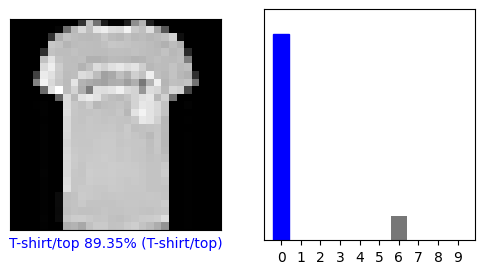

In [52]:
import numpy as np
import matplotlib.pyplot as plt

def plot_image(i, predictions_array, true_label, img):
    true_label, img = true_label.iloc[i], img.iloc[i].values.reshape(28, 28)
    plt.grid(False)
    plt.xticks([])
    plt.yticks([])
    plt.imshow(img, cmap='gray')
    predicted_label = np.argmax(predictions_array)
    color = 'blue' if predicted_label == true_label else 'red'
    plt.xlabel(f"{class_names[predicted_label]} {100 * np.max(predictions_array):.2f}% ({class_names[true_label]})", color=color)

def plot_value_array(i, predictions_array, true_label):
    true_label = true_label.iloc[i]
    plt.grid(False)
    plt.xticks(range(10))
    plt.yticks([])
    thisplot = plt.bar(range(10), predictions_array, color="#777777")
    plt.ylim([0, 1])
    predicted_label = np.argmax(predictions_array)
    thisplot[predicted_label].set_color('red')
    thisplot[true_label].set_color('blue')

i = 19
plt.figure(figsize=(6, 3))
plt.subplot(1, 2, 1)
plot_image(i, predictions_sklearn[i], test_labels, test_images)
plt.subplot(1, 2, 2)
plot_value_array(i, predictions_sklearn[i], test_labels)
plt.show()


In [53]:
import numpy as np
import matplotlib.pyplot as plt

def save_image_only(i, true_label, img):
    img = img.iloc[i].values.reshape(28, 28)

    plt.imshow(img, cmap='gray')
    plt.axis('off')
    plt.savefig(f"image_only_{i}.jpeg", bbox_inches='tight', pad_inches=0)
    plt.close()

i = 19
save_image_only(i, test_labels, test_images)


In [54]:
import pandas as pd

data = {
    'Model': ['TensorFlow', 'Scikit-Learn'],
    'Accuracy': [test_acc_tf, test_acc_sklearn],
    'Architecture': ['Neural Network (2 hidden layers)', 'MLP (2 hidden layers)'],
    'Early Stopping': ['Yes', 'Yes']
}


comparison_df = pd.DataFrame(data)

best_model = comparison_df.loc[comparison_df['Accuracy'].idxmax()]

print("Comparison of Model Performance:")
print(comparison_df)

print("\nBest Model Based on Accuracy:")
print(best_model)


Comparison of Model Performance:
          Model  Accuracy                      Architecture Early Stopping
0    TensorFlow    0.8833  Neural Network (2 hidden layers)            Yes
1  Scikit-Learn    0.8736             MLP (2 hidden layers)            Yes

Best Model Based on Accuracy:
Model                                   TensorFlow
Accuracy                                    0.8833
Architecture      Neural Network (2 hidden layers)
Early Stopping                                 Yes
Name: 0, dtype: object


In [55]:
import pickle

with open('best_model.pkl', 'wb') as file:
    pickle.dump(model_sklearn, file)


In [56]:
import pickle
import tensorflow as tf
model_tf.save('best_model_tf.h5')
